In [1]:
import pandas as pd
import gzip
import sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns#importing the seaborn library
from tqdm import tqdm
import re

import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cut_tree

In [12]:
dfBooks = pd.read_csv('A:\OneDrive\Documents\Master project cluster\df_books.csv.gz')

In [13]:

dfBooks['authors'] = [i[1:-1] for i in dfBooks['authors']]

dfBooks['authors'] = [i.split(',')[0] for i in dfBooks['authors']]
dfBooks['authors'].astype(str)

dfBooks['authors'] = [i[13:] for i in dfBooks['authors']]

In [14]:
dfBooks['authors'] = [i[2:-1] for i in dfBooks['authors']]
dfBooks['authors'].sample(10)

626664     4400204
620689      257752
1145771    4669780
673603      720668
1303058      87505
544980     6984073
1136773       1654
595554     4822048
115136      727313
786215       21346
Name: authors, dtype: object

In [15]:
dfBooks.rename(columns={'authors':'author_id'}, inplace= True)

dfBooks['author_id'] = pd.to_numeric(dfBooks['author_id'])

In [16]:
dfAuthors = pd.read_csv('A:\OneDrive\Documents\Master project cluster\df_authors.csv.gz')
dfAuthors.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


In [17]:
df = pd.merge(dfBooks, dfAuthors, on="author_id")
df.head()

,isbn,text_reviews_count_x,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating_x,kindle_asin,...,image_url,book_id,ratings_count_x,work_id,title,title_without_series,average_rating_y,text_reviews_count_y,name,ratings_count_y
0,NaN,7,['189911'],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,False,4.03,NaN,...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",3.92,5075,Barbara Hambly,122118
1,0345381017,65,[],US,eng,"[{'count': '381', 'name': 'to-read'}, {'count'...",NaN,False,3.76,B004TC146E,...,https://s.gr-assets.com/assets/nophoto/book/11...,438134,689,426994,Bride of the Rat God,Bride of the Rat God,3.92,5075,Barbara Hambly,122118
2,0345421906,18,['189928'],US,eng,"[{'count': '376', 'name': 'to-read'}, {'count'...",NaN,False,3.50,B002IPZH8U,...,https://images.gr-assets.com/books/1320471809m...,438132,498,426992,"Knight of the Demon Queen (Winterlands, #3)","Knight of the Demon Queen (Winterlands, #3)",3.92,5075,Barbara Hambly,122118
3,NaN,2,['189927'],US,NaN,"[{'count': '451', 'name': 'to-read'}, {'count'...",B002IPZHA8,True,3.64,B002IPZHA8,...,https://s.gr-assets.com/assets/nophoto/book/11...,11579087,45,170348,"Dragonshadow (Winterlands, Book 2)","Dragonshadow (Winterlands, Book 2)",3.92,5075,Barbara Hambly,122118
4,0727884271,47,['611220'],US,eng,"[{'count': '127', 'name': 'to-read'}, {'count'...",NaN,False,4.10,B00OERTV1Y,...,https://images.gr-assets.com/books/1420790916m...,21538610,183,40872609,"Crimson Angel (Benjamin January, #13)","Crimson Angel (Benjamin January, #13)",3.92,5075,Barbara Hambly,122118


In [18]:
df.rename(columns={'name':'author_name'}, inplace= True)


In [19]:
df.rename(columns={'average_rating_x':'book_average_rating', 'ratings_count_x':'book_ratings_count', 
                   'text_reviews_count_x':'book_text_review_count',
                  'average_rating_y':'author_average_rating', 'ratings_count_y': 'author_ratings_count',
                  'text_reviews_count_y': 'author_text_reviews_count'}, inplace = True)

In [20]:

df['book_average_rating'] = pd.to_numeric(df['book_average_rating'], downcast = 'float')

In [21]:
df['series'] = [i[2:-2] for i in df['series']]

newvalues = []

for index, value in df['series'].items():
    try: 
        value = pd.to_numeric(value, downcast = 'float')
        newvalues.append(value)
    except:
        value = value.split(',')[0]
        value = value[:-1]
        value = pd.to_numeric(value, downcast = 'float')
        newvalues.append(value)

df['series'] = newvalues

In [12]:
HierDf = df.copy()

In [13]:
HierDf= HierDf.drop_duplicates(subset=['title'])


In [14]:
HierDf['similar_books'] = [i[2:-2] for i in HierDf['similar_books']]

In [15]:
newValues=[]
for index, value in HierDf['similar_books'].items():
    try: 
        value = value.split(',')[0]
        value = value[:-1]
        value = pd.to_numeric(value, downcast= 'float')
        newValues.append(value)
    except:
        print('n')
    
HierDf['similar_books'] = newValues

In [16]:
#since all country code are US, delete column  
del HierDf['country_code']
#removing language code from the hier dataframe 
del HierDf['language_code']
#removing the popular shelves 
del HierDf['popular_shelves']
#removing asin
del HierDf['asin']
#removing description 
del HierDf['description']
#removing description
del HierDf['format']
#removing link
del HierDf['link']
#removing publisher
del HierDf['publisher']
#removing image link 
del HierDf['image_url']

In [17]:
del HierDf['edition_information']
del HierDf['url']
del HierDf['title']
del HierDf['title_without_series']

In [18]:
del HierDf['author_name']

del HierDf['kindle_asin']
del HierDf['isbn']

In [19]:
del HierDf['isbn13']

In [20]:
HierDf.columns

Index(['book_text_review_count', 'series', 'is_ebook', 'book_average_rating',
       'similar_books', 'author_id', 'num_pages', 'publication_day',
       'publication_month', 'publication_year', 'book_id',
       'book_ratings_count', 'work_id', 'author_average_rating',
       'author_text_reviews_count', 'author_ratings_count'],
      dtype='object')

In [21]:
HierDf.dtypes

book_text_review_count         int64
series                       float32
is_ebook                        bool
book_average_rating          float32
similar_books                float32
author_id                    float64
num_pages                    float64
publication_day              float64
publication_month            float64
publication_year             float64
book_id                        int64
book_ratings_count             int64
work_id                        int64
author_average_rating        float64
author_text_reviews_count      int64
author_ratings_count           int64
dtype: object

In [22]:
HierDf

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_day,publication_month,publication_year,book_id,book_ratings_count,work_id,author_average_rating,author_text_reviews_count,author_ratings_count
0,7,189911.0,False,4.03,19997.0,10333.0,600.0,NaN,NaN,1987.0,7327624,140,8948723,3.92,5075,122118
1,65,NaN,False,3.76,263758.0,10333.0,336.0,31.0,10.0,1994.0,438134,689,426994,3.92,5075,122118
2,18,189928.0,False,3.50,10719103.0,10333.0,352.0,31.0,10.0,2000.0,438132,498,426992,3.92,5075,122118
3,2,189927.0,True,3.64,10719103.0,10333.0,NaN,NaN,NaN,NaN,11579087,45,170348,3.92,5075,122118
4,47,611220.0,False,4.10,7968825.0,10333.0,247.0,1.0,12.0,2014.0,21538610,183,40872609,3.92,5075,122118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308950,6,NaN,False,4.12,NaN,429185.0,576.0,1.0,2.0,2001.0,823090,51,808888,4.06,7,84
1308951,2,NaN,False,3.57,NaN,411801.0,173.0,NaN,NaN,2002.0,6549923,17,1260023,3.71,7,76
1308952,3,NaN,False,4.46,NaN,172325.0,44.0,1.0,5.0,1998.0,690342,57,676689,4.23,34,328
1308953,22,NaN,False,3.82,7219701.0,164105.0,245.0,30.0,4.0,2003.0,282244,137,273797,3.75,57,305


In [23]:
HierDf.fillna(0)
HierDf = HierDf[np.isfinite(HierDf).all(1)]
HierDf

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_day,publication_month,publication_year,book_id,book_ratings_count,work_id,author_average_rating,author_text_reviews_count,author_ratings_count
2,18,189928.0,False,3.50,10719103.0,10333.0,352.0,31.0,10.0,2000.0,438132,498,426992,3.92,5075,122118
4,47,611220.0,False,4.10,7968825.0,10333.0,247.0,1.0,12.0,2014.0,21538610,183,40872609,3.92,5075,122118
7,8,432622.0,False,3.26,700095.0,10333.0,330.0,1.0,4.0,1995.0,898954,135,1230005,3.92,5075,122118
9,49,189921.0,False,3.97,555501.0,10333.0,480.0,30.0,4.0,2002.0,176243,694,170275,3.92,5075,122118
12,4,189898.0,True,3.93,611346.0,10333.0,369.0,29.0,3.0,2011.0,13566733,21,170340,3.92,5075,122118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308252,33,466562.0,True,3.68,8061670.0,6915368.0,352.0,12.0,12.0,2012.0,17225457,41,23731304,3.68,33,41
1308636,80,185573.0,False,3.90,64006.0,1339253.0,144.0,11.0,11.0,2008.0,3138825,894,3170262,3.96,102,1263
1308670,11,919846.0,False,3.48,12409185.0,4804452.0,212.0,6.0,7.0,2012.0,13705173,81,19337681,3.48,11,98
1308734,16,305204.0,True,3.78,7031013.0,5133405.0,280.0,9.0,10.0,2011.0,12375954,34,17356438,3.94,25,53


In [24]:
del HierDf['author_text_reviews_count']
del HierDf['author_ratings_count']
HierDf

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_day,publication_month,publication_year,book_id,book_ratings_count,work_id,author_average_rating
2,18,189928.0,False,3.50,10719103.0,10333.0,352.0,31.0,10.0,2000.0,438132,498,426992,3.92
4,47,611220.0,False,4.10,7968825.0,10333.0,247.0,1.0,12.0,2014.0,21538610,183,40872609,3.92
7,8,432622.0,False,3.26,700095.0,10333.0,330.0,1.0,4.0,1995.0,898954,135,1230005,3.92
9,49,189921.0,False,3.97,555501.0,10333.0,480.0,30.0,4.0,2002.0,176243,694,170275,3.92
12,4,189898.0,True,3.93,611346.0,10333.0,369.0,29.0,3.0,2011.0,13566733,21,170340,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308252,33,466562.0,True,3.68,8061670.0,6915368.0,352.0,12.0,12.0,2012.0,17225457,41,23731304,3.68
1308636,80,185573.0,False,3.90,64006.0,1339253.0,144.0,11.0,11.0,2008.0,3138825,894,3170262,3.96
1308670,11,919846.0,False,3.48,12409185.0,4804452.0,212.0,6.0,7.0,2012.0,13705173,81,19337681,3.48
1308734,16,305204.0,True,3.78,7031013.0,5133405.0,280.0,9.0,10.0,2011.0,12375954,34,17356438,3.94


In [25]:
del HierDf['publication_day']
del HierDf['publication_month']
HierDf

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating
2,18,189928.0,False,3.50,10719103.0,10333.0,352.0,2000.0,438132,498,426992,3.92
4,47,611220.0,False,4.10,7968825.0,10333.0,247.0,2014.0,21538610,183,40872609,3.92
7,8,432622.0,False,3.26,700095.0,10333.0,330.0,1995.0,898954,135,1230005,3.92
9,49,189921.0,False,3.97,555501.0,10333.0,480.0,2002.0,176243,694,170275,3.92
12,4,189898.0,True,3.93,611346.0,10333.0,369.0,2011.0,13566733,21,170340,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...
1308252,33,466562.0,True,3.68,8061670.0,6915368.0,352.0,2012.0,17225457,41,23731304,3.68
1308636,80,185573.0,False,3.90,64006.0,1339253.0,144.0,2008.0,3138825,894,3170262,3.96
1308670,11,919846.0,False,3.48,12409185.0,4804452.0,212.0,2012.0,13705173,81,19337681,3.48
1308734,16,305204.0,True,3.78,7031013.0,5133405.0,280.0,2011.0,12375954,34,17356438,3.94


In [26]:
del HierDf['book_text_review_count']

In [27]:
HierDf.shape
#only keping book saiwht review rating over 3
HierDf = HierDf[HierDf['book_average_rating'] > 3]
HierDf.shape

(145835, 11)

In [28]:
HierDf.dtypes

series                   float32
is_ebook                    bool
book_average_rating      float32
similar_books            float32
author_id                float64
num_pages                float64
publication_year         float64
book_id                    int64
book_ratings_count         int64
work_id                    int64
author_average_rating    float64
dtype: object

In [29]:
del HierDf['is_ebook']

In [30]:
HierDf['series'] = HierDf['series'].astype(int)


C:\Users\Sarah\AppData\Local\Temp\ipykernel_24440\353736184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HierDf['series'] = HierDf['series'].astype(int)


In [31]:
del HierDf['author_id']

In [32]:
HierDf

,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating
2,189928,3.50,10719103.0,352.0,2000.0,438132,498,426992,3.92
4,611220,4.10,7968825.0,247.0,2014.0,21538610,183,40872609,3.92
7,432622,3.26,700095.0,330.0,1995.0,898954,135,1230005,3.92
9,189921,3.97,555501.0,480.0,2002.0,176243,694,170275,3.92
12,189898,3.93,611346.0,369.0,2011.0,13566733,21,170340,3.92
...,...,...,...,...,...,...,...,...,...
1308252,466562,3.68,8061670.0,352.0,2012.0,17225457,41,23731304,3.68
1308636,185573,3.90,64006.0,144.0,2008.0,3138825,894,3170262,3.96
1308670,919846,3.48,12409185.0,212.0,2012.0,13705173,81,19337681,3.48
1308734,305204,3.78,7031013.0,280.0,2011.0,12375954,34,17356438,3.94


In [33]:
HierDf.to_csv('HierDf.csv')

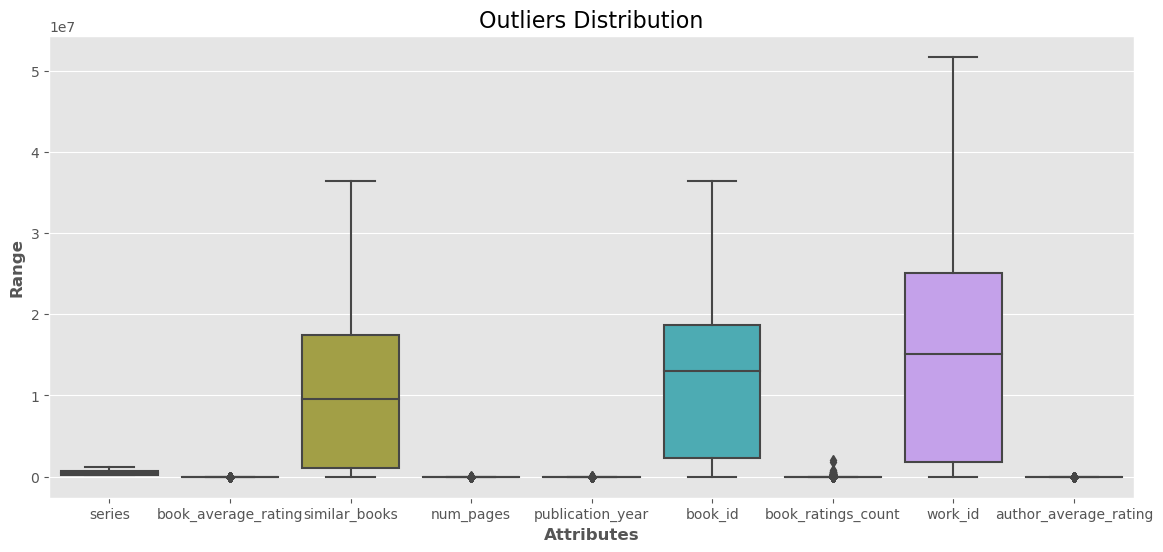

In [34]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(HierDf)

In [35]:
temp_df = HierDf.sample(frac = 0.4)

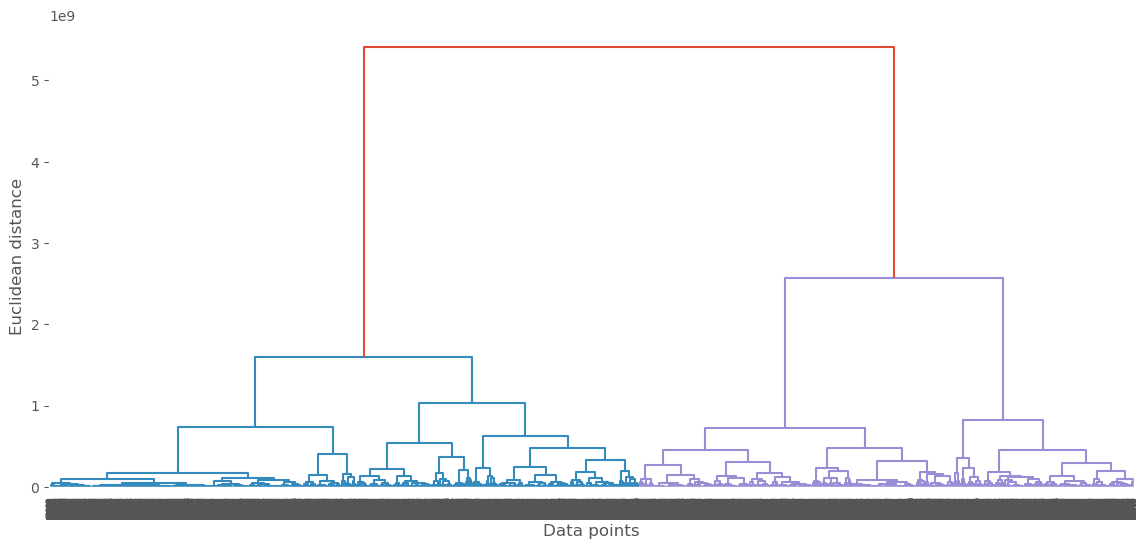

In [36]:
merg = linkage(temp_df, method = 'ward')
dendrogram(merg, leaf_rotation = 90)
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

In [37]:
temp_df

,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating
402519,505278,3.75,15703627.0,245.0,2013.0,17934037,86,25139654,3.88
285638,196812,3.71,88512.0,368.0,2000.0,788370,746,774359,3.81
753471,242375,3.99,2271134.0,56.0,2011.0,11554726,19,2387970,3.71
339971,320858,4.19,1846917.0,400.0,2013.0,15798688,28,16964327,4.13
54007,332818,4.17,835225.0,224.0,2008.0,3157876,21361,3189584,4.12
...,...,...,...,...,...,...,...,...,...
313922,504557,3.89,10382215.0,372.0,2013.0,17700442,74,18982971,3.92
520594,634587,4.12,25066772.0,120.0,2014.0,20898019,58475,41250341,4.12
316488,194701,4.09,1861059.0,755.0,2009.0,3667676,3422,3710916,4.11
129870,166250,4.23,355917.0,512.0,2010.0,13479149,31,3346751,4.32


In [38]:
from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(merg, n_clusters=4).reshape(-1, )
temp_df["Cluster"] = cluster_labels

#sns.boxplot(x='Cluster', y='fico', data= temp_df)

print(cut_tree(merg, n_clusters=4).T)

[[0 1 2 ... 1 2 0]]


In [2]:
HierDf = pd.read_csv('.\HierDf.csv')

In [3]:
HierDf

,Unnamed: 0,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating
0,2,189928,3.50,10719103.0,352.0,2000.0,438132,498,426992,3.92
1,4,611220,4.10,7968825.0,247.0,2014.0,21538610,183,40872609,3.92
2,7,432622,3.26,700095.0,330.0,1995.0,898954,135,1230005,3.92
3,9,189921,3.97,555501.0,480.0,2002.0,176243,694,170275,3.92
4,12,189898,3.93,611346.0,369.0,2011.0,13566733,21,170340,3.92
...,...,...,...,...,...,...,...,...,...,...
145830,1308252,466562,3.68,8061670.0,352.0,2012.0,17225457,41,23731304,3.68
145831,1308636,185573,3.90,64006.0,144.0,2008.0,3138825,894,3170262,3.96
145832,1308670,919846,3.48,12409185.0,212.0,2012.0,13705173,81,19337681,3.48
145833,1308734,305204,3.78,7031013.0,280.0,2011.0,12375954,34,17356438,3.94


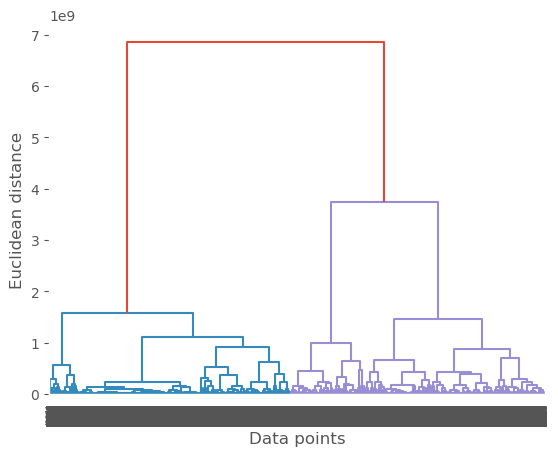

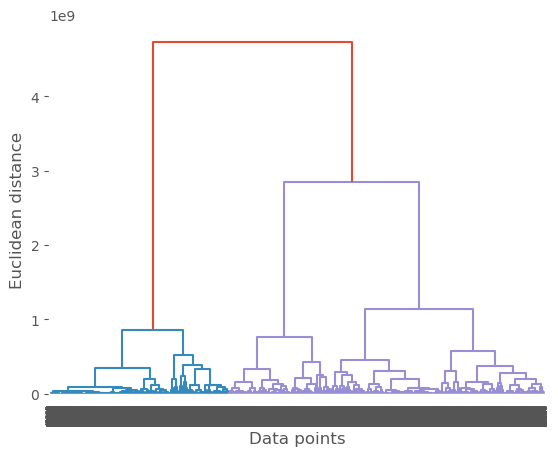

In [4]:

datafile = "HierDf.csv"
chunksize = 100000
models = []
cluster_labels = []

for chunk in pd.read_csv(datafile, chunksize=chunksize):
    model = linkage(chunk, method = 'ward')
    models.append(model)
    dendrogram(model, leaf_rotation = 90)
    plt.xlabel('Data points')
    plt.ylabel('Euclidean distance')
    plt.show()
    labels = cut_tree(model, n_clusters=4).reshape(-1, )
    cluster_labels.extend(labels)
    

HierDf = pd.read_csv('.\HierDf.csv')                  
HierDf['Cluster'] = cluster_labels

In [5]:
print(cluster_labels)

[0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 1, 0, 0, 3, 0, 0, 3, 0, 1, 0, 0, 0, 3, 3, 3, 0, 1, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 2, 2, 3, 0, 3, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 3, 0, 2, 1, 0, 0, 1, 2, 1, 3, 0, 0, 0, 1, 3, 0, 3, 3, 2, 0, 3, 0, 3, 2, 3, 0, 1, 2, 1, 3, 2, 2, 2, 0, 0, 1, 0, 3, 3, 2, 0, 0, 2, 0, 3, 0, 0, 1, 3, 3, 2, 0, 0, 0, 3, 2, 2, 0, 3, 3, 0, 

In [6]:
HierDf

,Unnamed: 0,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating,Cluster
0,2,189928,3.50,10719103.0,352.0,2000.0,438132,498,426992,3.92,0
1,4,611220,4.10,7968825.0,247.0,2014.0,21538610,183,40872609,3.92,1
2,7,432622,3.26,700095.0,330.0,1995.0,898954,135,1230005,3.92,0
3,9,189921,3.97,555501.0,480.0,2002.0,176243,694,170275,3.92,0
4,12,189898,3.93,611346.0,369.0,2011.0,13566733,21,170340,3.92,0
...,...,...,...,...,...,...,...,...,...,...,...
145830,1308252,466562,3.68,8061670.0,352.0,2012.0,17225457,41,23731304,3.68,2
145831,1308636,185573,3.90,64006.0,144.0,2008.0,3138825,894,3170262,3.96,0
145832,1308670,919846,3.48,12409185.0,212.0,2012.0,13705173,81,19337681,3.48,1
145833,1308734,305204,3.78,7031013.0,280.0,2011.0,12375954,34,17356438,3.94,1


In [7]:
datafile = "HierDf.csv"
chunksize = 100000
models = []
cluster_labels = []

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

for chunk in pd.read_csv(datafile, chunksize=chunksize):
    models.append(chunk)
    labels = hierarchical_cluster.fit_predict(chunk)
    cluster_labels.extend(labels)
    
print(cluster_labels)  

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 3, 3, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 0, 1, 3, 2, 1, 1, 2, 3, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 3, 1, 0, 1, 0, 3, 0, 1, 2, 3, 2, 0, 3, 3, 3, 1, 1, 2, 1, 0, 0, 3, 1, 1, 3, 1, 0, 1, 1, 2, 0, 0, 3, 1, 1, 1, 0, 3, 3, 1, 0, 0, 1, 

In [8]:
HierDf[HierDf['Cluster'] == 0]

,Unnamed: 0,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating,Cluster
0,2,189928,3.50,10719103.0,352.0,2000.0,438132,498,426992,3.92,0
2,7,432622,3.26,700095.0,330.0,1995.0,898954,135,1230005,3.92,0
3,9,189921,3.97,555501.0,480.0,2002.0,176243,694,170275,3.92,0
4,12,189898,3.93,611346.0,369.0,2011.0,13566733,21,170340,3.92,0
6,18,189983,3.90,77302.0,255.0,1985.0,712345,27,1696300,3.92,0
...,...,...,...,...,...,...,...,...,...,...,...
145811,1306785,215706,3.48,132895.0,155.0,2005.0,595616,55,582318,3.59,0
145813,1306808,919842,3.75,337302.0,283.0,2007.0,1311542,259,1300832,3.75,0
145816,1307023,283660,3.49,22514.0,225.0,2005.0,132016,96,127159,3.43,0
145829,1308204,155385,3.57,5226968.0,448.0,2007.0,3629872,171,1163669,3.84,0


In [22]:
HierDf['author_name'] = df['author_name']
HierDf['book_title'] = df['title']

In [23]:
HierDf

,Unnamed: 0,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating,Cluster,author_name,book_title
0,2,189928,3.50,10719103.0,352.0,2000.0,438132,498,426992,3.92,0,Barbara Hambly,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,4,611220,4.10,7968825.0,247.0,2014.0,21538610,183,40872609,3.92,1,Barbara Hambly,Bride of the Rat God
2,7,432622,3.26,700095.0,330.0,1995.0,898954,135,1230005,3.92,0,Barbara Hambly,"Knight of the Demon Queen (Winterlands, #3)"
3,9,189921,3.97,555501.0,480.0,2002.0,176243,694,170275,3.92,0,Barbara Hambly,"Dragonshadow (Winterlands, Book 2)"
4,12,189898,3.93,611346.0,369.0,2011.0,13566733,21,170340,3.92,0,Barbara Hambly,"Crimson Angel (Benjamin January, #13)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145830,1308252,466562,3.68,8061670.0,352.0,2012.0,17225457,41,23731304,3.68,2,Brigid Kemmerer,"Spirit (Elemental, #3)"
145831,1308636,185573,3.90,64006.0,144.0,2008.0,3138825,894,3170262,3.96,0,Brigid Kemmerer,Thicker Than Water
145832,1308670,919846,3.48,12409185.0,212.0,2012.0,13705173,81,19337681,3.48,1,Brigid Kemmerer,"Elemental (Elemental, #0.5)"
145833,1308734,305204,3.78,7031013.0,280.0,2011.0,12375954,34,17356438,3.94,1,Brigid Kemmerer,Letters to the Lost


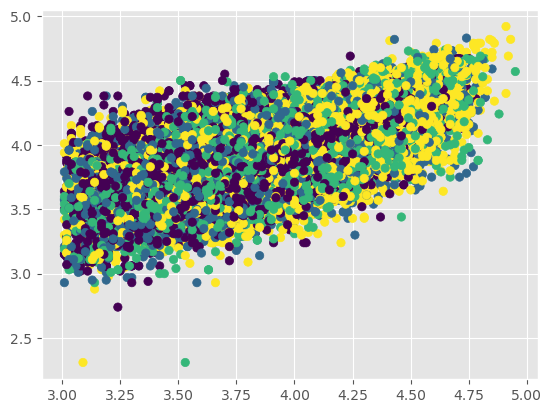

In [24]:

plt.scatter(HierDf['book_average_rating'], HierDf['author_average_rating'], c=HierDf['Cluster'])
plt.show()

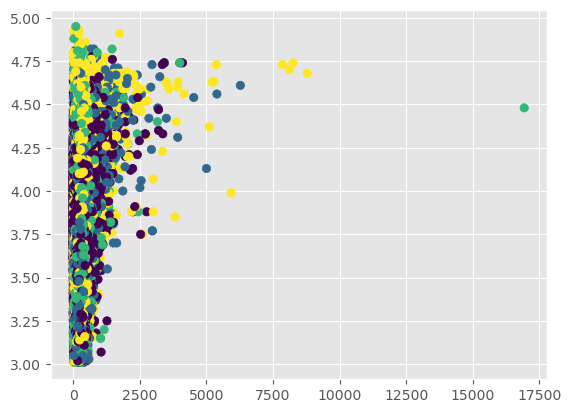

In [25]:
plt.scatter(HierDf['num_pages'],HierDf['book_average_rating'], c= HierDf['Cluster'])
plt.show()

In [26]:
HierDf.to_csv('HierDf_clustered.csv')

In [27]:
hierDfClust = pd.read_csv('.\HierDf_clustered.csv')

In [28]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


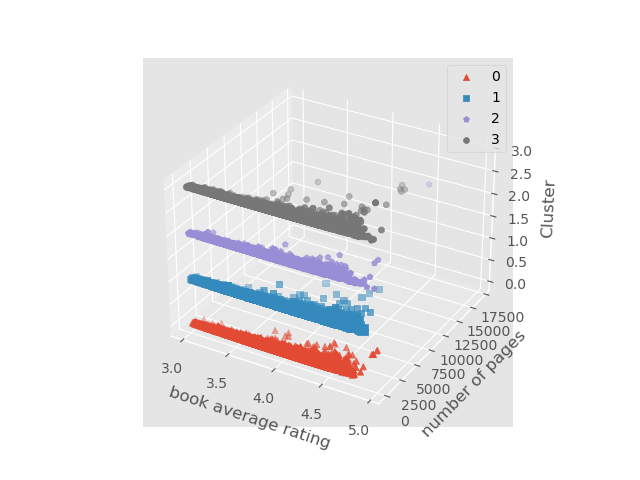

In [29]:
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups =hierDfClust.groupby(by='Cluster')

axis.set_xlabel('book average rating')
axis.set_ylabel('number of pages')
axis.set_zlabel('Cluster')

shapes_dict = dict(zip(groups.indices.keys(),['^','s','p','8','*']))

for name, group in groups:
    axis.scatter(group.book_average_rating, group.num_pages, group.Cluster ,marker=shapes_dict[name], label=name)

axis.legend()
plt.show()

In [30]:
hierDfClust

,Unnamed: 0.1,Unnamed: 0,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating,Cluster,author_name,book_title
0,0,2,189928,3.50,10719103.0,352.0,2000.0,438132,498,426992,3.92,0,Barbara Hambly,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,1,4,611220,4.10,7968825.0,247.0,2014.0,21538610,183,40872609,3.92,1,Barbara Hambly,Bride of the Rat God
2,2,7,432622,3.26,700095.0,330.0,1995.0,898954,135,1230005,3.92,0,Barbara Hambly,"Knight of the Demon Queen (Winterlands, #3)"
3,3,9,189921,3.97,555501.0,480.0,2002.0,176243,694,170275,3.92,0,Barbara Hambly,"Dragonshadow (Winterlands, Book 2)"
4,4,12,189898,3.93,611346.0,369.0,2011.0,13566733,21,170340,3.92,0,Barbara Hambly,"Crimson Angel (Benjamin January, #13)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145830,145830,1308252,466562,3.68,8061670.0,352.0,2012.0,17225457,41,23731304,3.68,2,Brigid Kemmerer,"Spirit (Elemental, #3)"
145831,145831,1308636,185573,3.90,64006.0,144.0,2008.0,3138825,894,3170262,3.96,0,Brigid Kemmerer,Thicker Than Water
145832,145832,1308670,919846,3.48,12409185.0,212.0,2012.0,13705173,81,19337681,3.48,1,Brigid Kemmerer,"Elemental (Elemental, #0.5)"
145833,145833,1308734,305204,3.78,7031013.0,280.0,2011.0,12375954,34,17356438,3.94,1,Brigid Kemmerer,Letters to the Lost


In [31]:
hierDfClust[hierDfClust["Cluster"] == 0].sample(10)

,Unnamed: 0.1,Unnamed: 0,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating,Cluster,author_name,book_title
84208,84208,537848,245514,3.74,2242964.0,265.0,2000.0,2443666,41,2450860,3.67,0,Charles Dickens,Great Expectations
14498,14498,87318,258622,3.82,720991.0,194.0,2006.0,56065,7363,3102286,3.84,0,Karin Slaughter,"Blindsighted (Grant County, #1)"
44337,44337,275990,275830,4.20,1365401.0,150.0,2000.0,142575,61,141844,4.15,0,Agatha Christie,The Affair at the Bungalow: A Short Story
3243,3243,21310,431960,3.99,474211.0,153.0,2012.0,15005757,34,2245507,3.74,0,Stephen King,"End of Watch (Bill Hodges Trilogy, #3)"
142803,142803,1177201,908708,4.16,2016619.0,223.0,2009.0,6664343,475,6859158,4.23,0,Danielle Steel,Granny Dan
43169,43169,268122,474508,3.82,9790789.0,295.0,2006.0,298927,534,290019,4.09,0,Agatha Christie,Greenshaw's Folly: A Short Story
56919,56919,351317,406557,3.69,6250448.0,256.0,1997.0,1178762,319,1166571,3.99,0,Fern Michaels,"Fast Track (Sisterhood: Rules of the Game, #3)"
41370,41370,256845,181054,4.09,127583.0,443.0,1990.0,2067672,32,2000164,4.07,0,Helen Harper,Highland Magic: The Complete Series
21386,21386,130593,199341,4.02,832487.0,0.0,2006.0,148950,39,143755,4.08,0,O. Henry,Classic American Short Stories
137287,137287,1056081,246257,3.70,2464778.0,340.0,2006.0,160416,1242,154837,3.85,0,Mary Calmes,Frog


In [33]:
hierDfClust[hierDfClust["author_name"] == 'L.J. Smith']

,Unnamed: 0.1,Unnamed: 0,series,book_average_rating,similar_books,num_pages,publication_year,book_id,book_ratings_count,work_id,author_average_rating,Cluster,author_name,book_title
